# 2016 USA Elections

Welcome to the Module 1 Capstone Project, focusing on the intricacies of the 2016 US presidential elections. Given county demographic data and votes for candidates in the 2016 primary election, my purpose is to propose cost-effective strategies that could help win the most votes in the general elections, reflecting the dynamics of the 2016 electoral battle. In the following paragraphs, I will describe my understanding and general information about this topic that will guide my actions through this project.

1) Primary elections mark the initial phase in the electoral process, where the Democrats and Republicans nominate their candidates for the general election. Unlike general elections, primaries concentrate exclusively on intra-party competition to determine each party's nominee, which each party holding a separate election. It is important to recognize  that primary voters can serve as a representative sample of the overall electorate, aiding parties in strategic preparations for the general election. Some states host closed primaries, restricting voting participation to registered party members only. 

2) In U.S. general presidential elections, candidates compete to secure electoral votes rather than the popular vote. To win the presidency, a candidate must secure 270 electoral votes, with each state contributing a specific number of votes primarily based on its population. Winning a state's electoral votes requires winning the popular vote in that state, constituting a direct state-level election. States are typically categorized as swing (often considered when the vote margin is within a 5% difference) or safe, with swing states being pivotal battlegrounds that can shift between election cycles, while safe states consistently support one party. The current electoral map has been stable for the last two decades. The significance of swing states in U.S. elections cannot be overstated. Despite Hillary Clinton winning the popular vote, the critical factor lies in the percentages lost in pivotal swing states, determining the ultimate election outcome. It's not merely a question of winning total votes but strategically securing key battlegrounds, often with margins of victory less than one percent.

3) There is a lack of transparency concerning the exact amounts of money allocated for campaigning, with parties often preferring to keep such details confidential. Although both parties seek to appeal to all segments of the electorate, limited resources mean that securing some votes is easier than others. Additionally, certain groups may be less inclined to support a party even with significant financial investment. This project aims to tackle the challenge of prioritization.

Beyond common knowledge, I would like to uncover unique information that goes beyond what is readily available from mainstream commentators on this topic. The ultimate goal is to develop a logical and systematic approach to select specific demographics and further identify the best counties for strategic investment, enhancing voter turnout, and maximizing impact. I would hope to connect the findings to real-world messaging, or at the very least, there should be a conceivable interpretation of what that message could look like.

The data and shape file is available at: [2016 US Election](https://www.kaggle.com/datasets/benhamner/2016-us-election).

# Data Initialization and Cleaning

The upcoming section will detail the imported data, initial cleaning, and formatting for future analysis.

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.axes._axes import Axes
from collections import OrderedDict
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
from IPython.display import display, Image, Markdown
from src.functions import *

## Demographic Data

This dataset encompasses U.S. county-level demographics for the entire country. Alongside it, the dataset detailing votes for each candidate in the primary election will be the primary focus of this analysis. The work may also touch upon other crucial factors, such as communication, policy, and cultural values.

We will begin by dropping the least useful features. Specifically, we will remove two features displaying population data from 2010, as we possess more recent data, and the dataset lacks additional population numbers for temporal analysis: 'PST040210', 'POP010210'. Additionally, eliminate two features about Pacific Islanders, given their relatively small population: 'RHI525214', 'SBO515207'. Omit retail sales, as we already have a more useful feature of retail sales per capita: 'RTN130207'. Finally, rename the features for clarity.

In [2]:
demographics = pd.read_csv("county_facts.csv")
columns_to_drop = ["PST040210", "POP010210", "RHI525214", "SBO515207", "RTN130207"]
demographics = demographics.drop(columns=columns_to_drop)
demographics.rename(columns=new_column_names, inplace=True)
demographics.head()

,fips,area_name,state_abbreviation,Population 2014,Population Change 10to14 %,Age Under 5 %,Age Under 18 %,Age Over 65 %,Female %,White %,...,Asian Owned Firms %,Hispanic Owned Firms %,Women Owned Firms %,Manufacturers Shipments,Merchant Wholesaler Sales,Retail Sales Per Capita,Accommodation Food Services Sales,Building Permits,Land Area SqMiles,Population Per SqMile
0,0,United States,NaN,318857056,3.3,6.2,23.1,14.5,50.8,77.4,...,5.7,8.3,28.8,5319456312,4174286516,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,1.4,6.1,22.8,15.3,51.5,69.7,...,1.8,1.2,28.1,112858843,52252752,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,1.5,6.0,25.2,13.8,51.4,77.9,...,1.3,0.7,31.7,0,0,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,9.8,5.6,22.2,18.7,51.2,87.1,...,1.0,1.3,27.3,1410273,0,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,-2.1,5.7,21.2,16.5,46.6,50.2,...,0.0,0.0,27.0,0,0,6334,0,8,884.88,31.0


In [3]:
demographics.select_dtypes(include="number").shape[1]

47

The election was held in 2016, when the U.S. population was 323.1 million. As is visibled in the dataframe, there were 318.9 million people in the U.S. in 2014. We will use this number as the population figure for the election year. Additionally, the data covers a range of years, with most features spanning from 2009 to 2013, and the oldest features dating back to 2007. While this introduces some uncertainty into the analysis, it is challenging to find another dataset with such comprehensive census data that would be closer to the election year.

There are 47 numeric features in the dataset, with no categorical data present. I will check for any duplicate entries.

In [4]:
demographics.duplicated("fips").any()

False

Check for any missing values in the dataset.

In [5]:
demographics[demographics.isnull().any(axis=1)].head()

,fips,area_name,state_abbreviation,Population 2014,Population Change 10to14 %,Age Under 5 %,Age Under 18 %,Age Over 65 %,Female %,White %,...,Asian Owned Firms %,Hispanic Owned Firms %,Women Owned Firms %,Manufacturers Shipments,Merchant Wholesaler Sales,Retail Sales Per Capita,Accommodation Food Services Sales,Building Permits,Land Area SqMiles,Population Per SqMile
0,0,United States,NaN,318857056,3.3,6.2,23.1,14.5,50.8,77.4,...,5.7,8.3,28.8,5319456312,4174286516,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,1.4,6.1,22.8,15.3,51.5,69.7,...,1.8,1.2,28.1,112858843,52252752,12364,6426342,13369,50645.33,94.4
69,2000,Alaska,NaN,736732,3.7,7.4,25.3,9.4,47.4,66.9,...,3.1,0.0,25.9,8204030,4563605,13635,1851293,1518,570640.95,1.2
99,4000,Arizona,NaN,6731484,5.3,6.4,24.1,15.9,50.3,83.7,...,3.3,10.7,28.1,57977827,57573459,13637,13268514,26997,113594.08,56.3
115,5000,Arkansas,NaN,2966369,1.7,6.5,23.8,15.7,50.9,79.7,...,1.4,2.3,24.5,60735582,29659789,11602,3559795,7666,52035.48,56.0


Some entries in the "state_abbreviation" column contain missing values. Each of whese rows represent the demographic information for the entire state. I will remove these rows, retaining only county-level information in the main 'demographics' dataframe.

In [6]:
demographics.dropna(inplace=True)

I will create new columns for merging this dataframe with primary election results dataframe and shape file that will be imported next.

In [7]:
demographics["State"] = demographics["state_abbreviation"].map(state_abbreviations_map)

demographics["area_name"] = demographics["area_name"].apply(
    lambda x: " ".join(x.split()[:-1])
)
demographics.rename(columns={"area_name": "County"}, inplace=True)

## Primary Results

The dataframe contains the candidates of each party and their corresponding vote counts in each county. All votes are combined at the county level, and we dont have information on individual voter demographic preferences. 

In [8]:
primary_res = pd.read_csv("primary_results.csv")
pd.set_option("display.float_format", "{:.2f}".format)
primary_res.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.00,Democrat,Bernie Sanders,544,0.18
1,Alabama,AL,Autauga,1001.00,Democrat,Hillary Clinton,2387,0.80
2,Alabama,AL,Baldwin,1003.00,Democrat,Bernie Sanders,2694,0.33
3,Alabama,AL,Baldwin,1003.00,Democrat,Hillary Clinton,5290,0.65
4,Alabama,AL,Barbour,1005.00,Democrat,Bernie Sanders,222,0.08


States of North Dakota, Colorado and Maine (swing state) have only data of Democratic votes. Minnesota (swing state) is missing completely.

In [9]:
democrat_data = primary_res[primary_res["party"] == "Democrat"]["state"].unique()
republican_data = primary_res[primary_res["party"] == "Republican"]["state"].unique()
set(democrat_data) - set(republican_data)

{'Colorado', 'Maine', 'North Dakota'}

In [10]:
"Minnesota" in primary_res["state"].values

False

Each U.S. state and county has a unique identifier number called FIPS. We will utilize this number to identify and check for any duplicates in the data. Given that the same counties have multiple candidates, I will also include the candidate name in the verification process.

In [11]:
primary_res[primary_res.duplicated(["fips", "candidate"])].head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
14589,New Hampshire,NH,Carroll,NaN,Democrat,Bernie Sanders,5655,0.64
14590,New Hampshire,NH,Carroll,NaN,Democrat,Hillary Clinton,3230,0.36
14591,New Hampshire,NH,Cheshire,NaN,Democrat,Bernie Sanders,12471,0.71
14592,New Hampshire,NH,Cheshire,NaN,Democrat,Hillary Clinton,5166,0.29
14593,New Hampshire,NH,Coos,NaN,Democrat,Bernie Sanders,3637,0.64


We observe that there are no duplicates in the dataframe; however, the state of New Hampshire is missing its FIPS number. Subsequently, I will inspect the dataset for any other missing data.

In [12]:
primary_res.isnull().any()

state                 False
state_abbreviation    False
county                False
fips                   True
party                 False
candidate             False
votes                 False
fraction_votes        False
dtype: bool

This missing FIPS is for New Hampshire only.

Additionally, there is a nuance in the data regarding county identification: While the majority of U.S. primaries adhered to official county boundaries, in a few states, the primary elections were conducted based on alternative demarcations. Consequently, representing election results in those counties using the geographic data from the shape file would not be possible.

Given that the geodataframe (shape file) and primary results dataframe lack matching columns, I will create a new column for future data merging.

In [13]:
primary_res["statefp"] = primary_res["fips"].apply(extract_state_code)
primary_res.loc[primary_res["state"] == "New Hampshire", "statefp"] = "33"

### Shape File

The election dataset form kaggle includes a shape file encompassing geometric data for all U.S counties.


In [14]:
shapefile_path = "county_shapefiles/cb_2014_us_county_500k.shp"
geo_counties = gpd.read_file(shapefile_path)
geo_counties["GEOID"] = geo_counties["GEOID"].astype(float)
columns_to_drop = ["AFFGEOID", "LSAD", "ALAND", "AWATER", "COUNTYNS", "COUNTYFP"]
geo_counties = geo_counties.drop(columns=columns_to_drop)
geo_counties.head()

,STATEFP,GEOID,NAME,geometry
0,01,1001.00,Autauga,"POLYGON Z ((-86.92120 32.65754 0.00000, -86.92..."
1,01,1005.00,Barbour,"POLYGON Z ((-85.74803 31.61918 0.00000, -85.74..."
2,01,1023.00,Choctaw,"POLYGON Z ((-88.47323 31.89386 0.00000, -88.46..."
3,01,1033.00,Colbert,"POLYGON Z ((-88.13925 34.58779 0.00000, -88.13..."
4,01,1047.00,Dallas,"POLYGON Z ((-87.47308 32.30761 0.00000, -87.42..."


This file incorporates all US-owned territories includingd the states of Alaska and Hawaii. Given their clear electoral outcomes as safe states for Republicans and Democrats respectively, the focus will be solely on U.S mainland. The contents of the geometric county data:

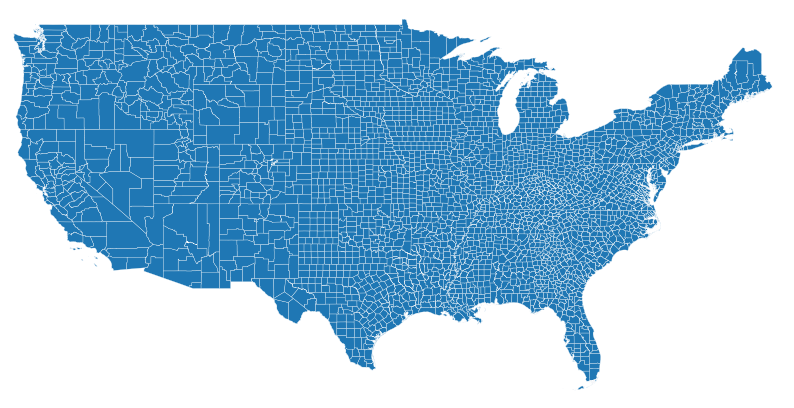

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
geo_counties.plot(ax=ax, edgecolor="white", linewidth=0.2)
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
ax.set_axis_off()

## Primary Election Data Accuracy Assessment

The initial phase of this project involves confirming whether primary election results accurately reflect the national electoral dynamics. As mentioned earlier, the primary election's aim is not to vie for state electoral votes but to select a candidate for the upcoming election. This discrepancy introduces a challenge when linking this data with the general election. Assessing whether our data accurately portrays the competitive nature of swing states is very important. I will check this by summing the votes for each party's individual candidates and compare the difference between the total votes obtained by each party with the general election results. It's possible that voter engagement in the primary differs significantly from that of the general election. If that was the case, this data would be unusable for general election prediction.

Swing states are typically considered to be those where the vote difference is within 5%. For my own work, I will expand this threshold to 10% to account for potential inaccuracies, given that the primary competition is not between different parties, but within a party.

Combine the counties into states:

In [16]:
geo_states = geo_counties.dissolve(by="STATEFP", aggfunc="sum").reset_index()
columns_to_drop = ["GEOID", "NAME"]
geo_states = geo_states.drop(columns=columns_to_drop)

Find the winning party by vote count in each state.

In [17]:
reworked_data = (
    primary_res.groupby(["statefp", "state_abbreviation", "party"])["votes"]
    .sum()
    .reset_index()
)
# Drop states containing only Democratic votes
reworked_data = reworked_data[
    ~reworked_data["state_abbreviation"].isin(["ND", "CO", "ME"])
]

idx = (
    reworked_data.groupby(["statefp", "state_abbreviation"])["votes"].transform("max")
    == reworked_data["votes"]
)
state_winner = reworked_data[idx][["statefp", "state_abbreviation", "party"]]

Identify states with a vote margin within 10%.

In [53]:
margin = 0.1
votes_in_each_state = reworked_data.pivot(
    index=["state_abbreviation", "statefp"], columns="party", values="votes"
).reset_index()
absolute_relative_difference = abs(
    votes_in_each_state["Democrat"] - votes_in_each_state["Republican"]
) / ((votes_in_each_state["Democrat"] + votes_in_each_state["Republican"]) / 2)
within_10_percent = absolute_relative_difference <= margin
swing_states = votes_in_each_state[within_10_percent]

Create a plot illustrating the winners of each state, emphasizing the swing states by adding a yellow stripe overlay. Below the plot, an imported jpg file shows the general 2016 election results with vote margins, allowing for comparison. Both plots use the conventional Democrat color of blue and Republican color of red to identify state control.

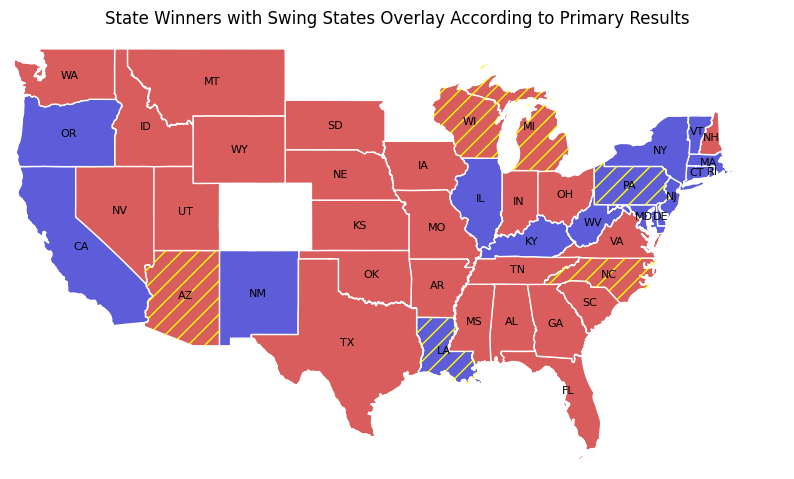

In [54]:
warnings.filterwarnings(
    "ignore", message="Geometry is in a geographic CRS*", category=UserWarning
)
geo_state_winners = geo_states.merge(
    state_winner, left_on="STATEFP", right_on="statefp", how="inner"
)
geo_swing_states = geo_states.merge(
    swing_states, left_on="STATEFP", right_on="statefp", how="inner"
)

fig, ax = plt.subplots(figsize=(10, 6))
geo_state_winners.plot(
    ax=ax,
    color=geo_state_winners["party"].map(
        {"Democrat": "#5d5dd9", "Republican": "#d95d5d"}
    ),
    edgecolor="white",
    linewidth=1,
)
geo_swing_states.plot(
    ax=ax, color="none", edgecolor="yellow", linewidth=0, hatch="//", alpha=1
)
# Annotate state abbreviations
for x, y, abbv in zip(
    geo_state_winners.centroid.x,
    geo_state_winners.centroid.y,
    geo_state_winners["state_abbreviation"],
):
    ax.annotate(
        text=abbv,
        xy=(x, y),
        fontsize=8,
        color="black",
        ha="center",
        va="center",
        weight="light",
    )
plt.title("State Winners with Swing States Overlay According to Primary Results")
ax.set_xlim(-125, -66)
ax.set_ylim(24, 50)
ax.set_axis_off()

<h3 style="text-align:center; margin-left:-360px;">General Election Outcome</h3>

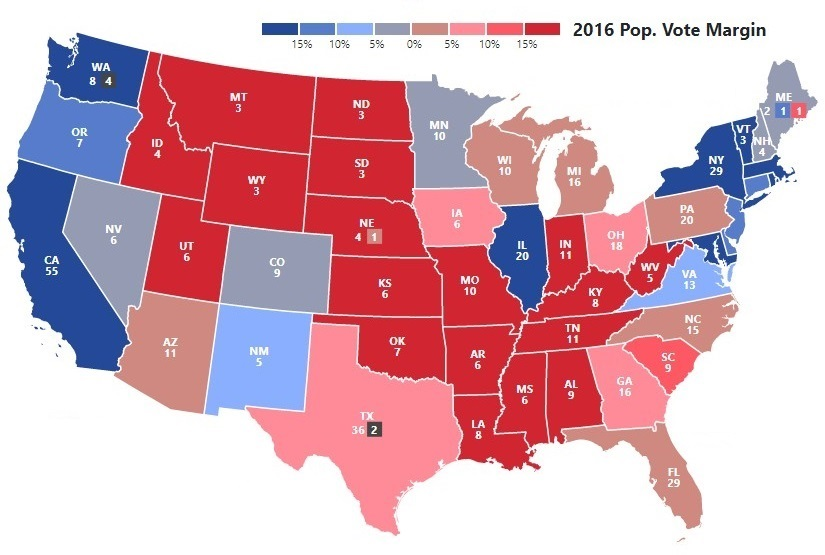

In [20]:
image_path = "2016GeneralElection.jpg"
display(
    Markdown(
        '<h3 style="text-align:center; margin-left:-360px;">General Election Outcome</h3>'
    )
)
display(Image(filename=image_path, width=700, height=700))

- Upon comparing the two maps, we observe significant similarity in voter activity, with most of primary winners accurately reflecting the winners of general election. This is except for the safe states of Washington, Louisiana, Kentucky, West Virginia and Virginia.
- By setting the vote margin to 10%, we capture 5 out of 6 swing states that were lost by the Democrats: Arizona, Wisconsin, Michigan, Pennsylvania, and North Carolina. Only Florida is missing. This is a promising result, confirming that this data is suitable for further analysis.
- The list of swing states won by the Democrats includes Nevada, Colorado, Minnesota, New Hampshire, and Maine. However, as mentioned previously, three of these states were missing Republican votes, making it impossible to assess vote ratios. Additionally, Nevada and New Hampshire were not identified as swing states, signaling a significant deviation in vote counts from the general election results.


The test has identified swing states like Florida, Nevada, and New Hampshire, along with a couple of safe states where primary data differed from the general election outcome. While it is still feasible to identify demographics in those states that support a particular party, it is not possible to accurately pinpoint the missing votes or the additional votes that led to this discrepancy without the involvement of other data sources. If this discrepancy was a uniform change of support across all demographics, it would still be possible to use this data to identify the most promising demographics and counties. However, if the reduction or increase in votes was non-uniform, it could lead to incorrect findings.

## Check for Demographic Feature Multicollinearity

The dataframe comprises 47 numeric features, which pose challenges in understanding their significance and determining if they hold unique value. To address this, I conducted a correlation analysis. In the resulting heatmap, I noted that several features showed strong correlations with the population number, indicating their flat measurement nature. These features were normalized by dividing them by the population number, with some being converted to percentages where appropriate. Since there is no need for high precision, the outliers were not removed, and instead, Spearman's correlation was selected for its robustness against outliers, facilitating the detection of high correlations without requiring preprocessing. The initial data transformation, which included converting identified features into per capita values and percentages, was performed in the first code block below, without presenting the initial highly correlated features. There is a single row with a population number of zero that has to be removed, because it would cause division by zero.

In [21]:
demographics = demographics.drop(2964)
demographics[new_feature_names] = demographics[features_to_calculate].div(
    demographics["Population 2014"], axis=0
)
demographics[new_feature_names[:3]] *= 100
demographics.drop(features_to_calculate, axis=1, inplace=True)
demographics["Veterans"] = (
    demographics["Veterans"] / demographics["Population 2014"]
) * 100
demographics.rename(columns={"Veterans": "Veterans %"}, inplace=True)

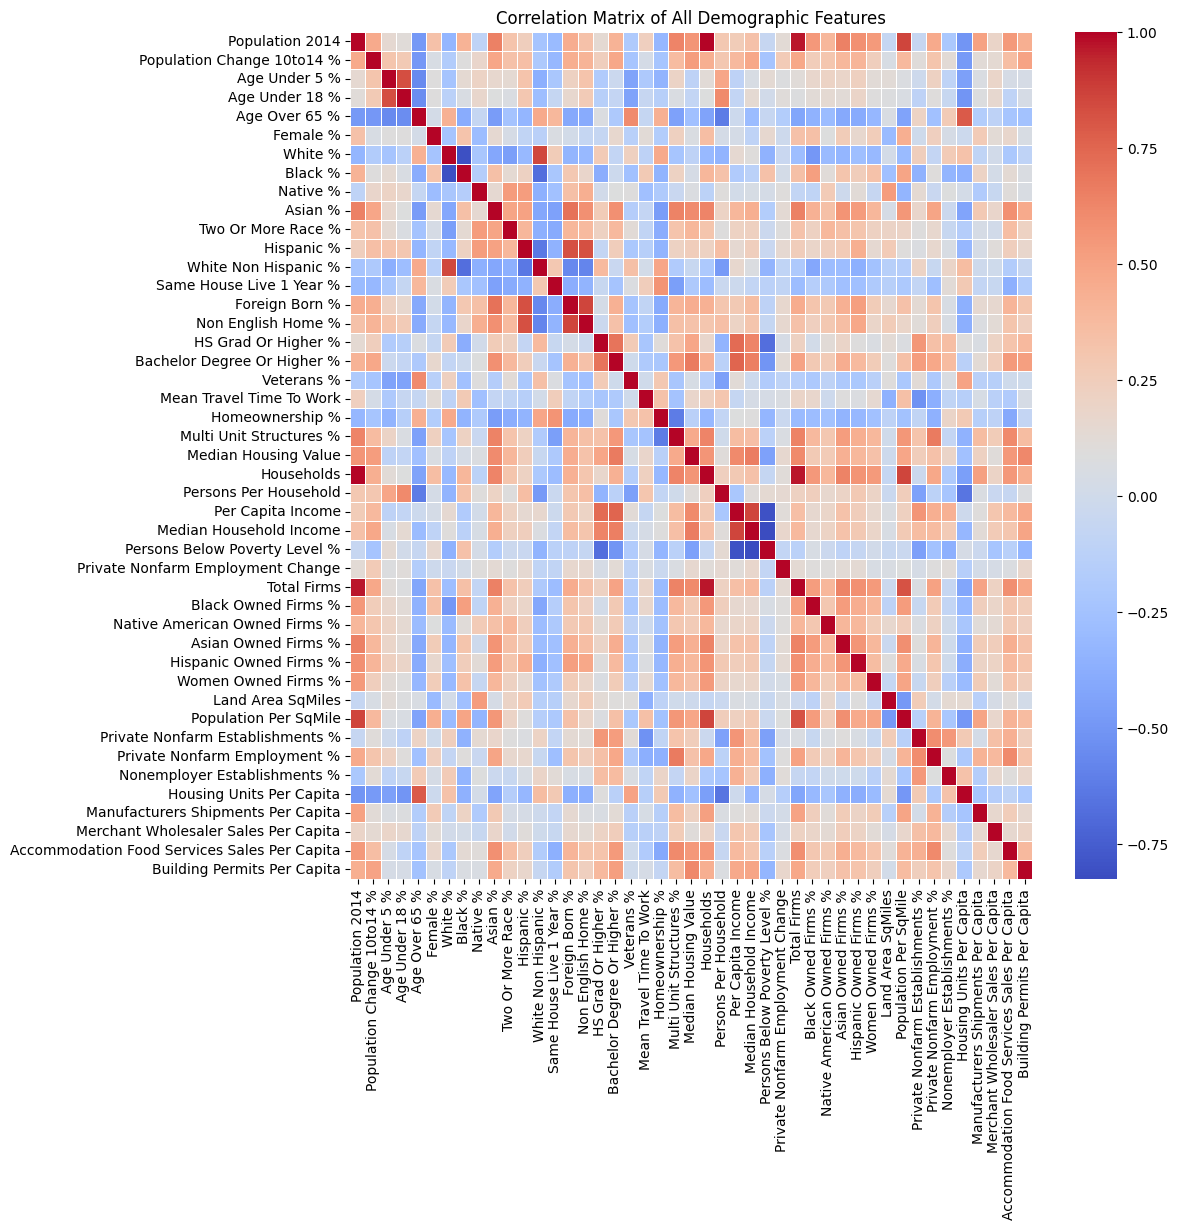

In [22]:
demographics_numeric = demographics.drop(
    columns=["fips", "County", "state_abbreviation", "State"]
)
correlations, p_values = spearmanr(demographics_numeric)
feature_names = demographics_numeric.columns
correlation_matrix = pd.DataFrame(
    correlations, columns=feature_names, index=feature_names
)
plt.figure(figsize=(11, 11))
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of All Demographic Features");

- Numerous features within the dataset present ambiguous interpretations. Should certain features with unclear meanings become prominent during analysis, I will try to explanain them as needed.
- A few features still show a strong correlation with the population number and cannot be converted into more meaningful measures, "Households" is redundant given that we already have the feature "Persons Per Household.
- Interpreting correlations between different demographics in this healmap might be unreliable due to the broad scope of the data. Local variations within states could potentially contradict the correlations at the national level.

In [23]:
demographics = demographics.drop(
    columns=["Total Firms", "Households", "Population Per SqMile"]
)

# Swing State Dynamics

## Method

The goal is to look for state-wide trends and assess their potential usefulness and applicability. This will be done by combining data from all candidates into a unified vote count for each party, offering a consolidated measure of voter engagement and enthusiasm. Coming to this work my plan is: calculate correlation cefficients between demographic features and percentage of votes in a state to determine if they are connected, assessing p-values to determine statistical significance of the correlation, and examining the slope of regression line between the two features to understand the magnitude of the relationship. Secondly, I will search for high potential counties, characterized by a significant amount of useful demographic, but lower voter engagement compared to similar counties. This will be done by examining how far points (counties) lie below the regression line. This is my initial plan that I hope to implement.

## How I Understand This Method

From the perspective of voting for a particular party, a correlation indicates that a specific group of people subscribe to certain ideas. In the case of a positive correlation, the success and appeal of those arguments can be replicated more broadly. It would be most sensible to focus on what has already proven to be effective. The slope indicates how useful those ideas are: a larger slope value suggests stronger attraction to those ideas. While a slope close to zero in practice means that the demographic is not actually supporting that party..

A negative correlation could also provide an opportunity for votes from demographics opposite to that of the initial demographic. It would raise a separate question whether the opposite demographic represents a meaningful group with interpretable ideas. The ideal scenario for any party is to have the most correlations and the highest magnitudes of slope, but this may not be possible in practice.

Low-support counties are primary targets to exercise proven arguments. A likely scenario is an initial burst of support towards the average (regression line), followed by increasing difficulty and expense in garnering additional votes. While selecting every county below average could be a viable strategy, I am uncertain whether it is better than focusing solely on the counties with the lowest of the low support.

## Arizona

The goal is to select demographics and counties that could provide the most votes for the Democratic party. Arizona was randomly chosen as the first state to analyze.

In the 2016 general election, out of the total population of 6.945 million, which includes all residents and not just eligible voters, 1,252,401 votes (18.02%) went to Donald Trump, and 1,161,167 votes (16.74%) went to Hillary Clinton. Donald Trump won by a margin of 91,234 votes (1.31%). Typically, election turnout is presented not on the total population but rather on the number of eligible voters. However, the demographic data only includes total population figures and not the number of eligible voters.

Let's check the number of votes each party received in the primaries.

In [24]:
selected_states = ["Arizona"]
arizona = merge_demographics_with_votes(demographics, primary_res, selected_states)
state_info(arizona)

2014 State Population: 6731484
Votes for Democrats: 399097, 5.93% of the population.
Votes for Republicans: 435103, 6.46% of the population.


The number of votes for each party in primary elections is approximately three times smaller than in the general election. I don't think that primary election results could allow to determine how much votes for each party would increase in the general election. This would require historical primary to general election vote ratios.

### Positive Correlations Between Demographics and Democratic Party Support

The goal is to find positively correlated features with sufficiently high slopes to be recommended to the Democratic party as demographics to prioritize. 
The functions calculate parameters for both parties, and it was interesting for me to compare them as I was working. However, since I couldn't find a way to apply the values calculated for the Republican party, I ended up removing them from the display in the end. The table below shows the head of the dataframe containing correlated features sorted by correlation coefficient. Throughout the work, Spearman's correlation is the only method utilized.

In [25]:
arizona_correlation = no_iqr_calculate_correlations(arizona).iloc[:, :3]
arizona_top_features = arizona_correlation.sort_values(
    by="Democrat Corr Coeff", ascending=False
)
arizona_top_features_list = arizona_top_features.index.tolist()[:2]
arizona_top_features.head()

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Female %,0.75,0.59,0.02
Private Nonfarm Employment %,0.09,0.44,0.10
Bachelor Degree Or Higher %,0.13,0.42,0.12
HS Grad Or Higher %,0.09,0.35,0.20
Non English Home %,0.03,0.31,0.25


In [26]:
print("Number of counties:", arizona.shape[0])

Number of counties: 15


*Looking back at this section of the work, I realize that I should have skipped investigating this state when I noticed only a few counties and moved on and not resorted to p-hacking.*


- We observe large p-values for all features except a single one: "Female %". This raises a question as to whether demographic data is actually a predictor of party support.
- I checked other states to see if the number of statistically significant correlations is higher, and in fact, it is. Arizona's mere 15 counties yield high p-values, indicating significant limitations in the analysis due to the small sample size. This was also the reason why no outliers were removed from the data.
- Identification of a single feature is insufficient for a state analysis. Additional validation or rejection of the significance of more is needed. This is a big problem, and the only way forward I see is a comparative examination with similar states to reevaluate the reliability of the findings.

Before continuing: the second most highly correlated feature, albeit with a p-value of 0.1, is "private non-farm employment". What does this demographic represent?

In [27]:
pnfe_research = feature_research(arizona, "Private Nonfarm Employment %").sort_values(
    by="Corr Coeff", ascending=False
)
pnfe_research[pnfe_research["p-value"] <= 0.05].sort_values(by="Slope", ascending=False)

,Slope,Corr Coeff,p-value
Accommodation Food Services Sales Per Capita,10.58,0.76,0.00
Private Nonfarm Establishments %,10.46,0.90,0.00
Asian Owned Firms %,4.64,0.81,0.00
Nonemployer Establishments %,2.90,0.80,0.00
Female %,2.50,0.59,0.03
Manufacturers Shipments Per Capita,1.28,0.58,0.03
Multi Unit Structures %,1.00,0.81,0.00
Bachelor Degree Or Higher %,0.86,0.82,0.00
HS Grad Or Higher %,0.57,0.57,0.03
Median Housing Value,0.00,0.89,0.00


- This is solely an economic feature relating to working people, notable for its strong negative association with homeownership and slopes of zero for features related to income, implying average-modest wages. These individuals could belong to the lower-middle-class bracket.
- This finding surprises me because my general understanding is that economic divides in recent history have become less prominent in politics. The current divides seem to revolve much more around cultural issues.
- Having so few options is unfortunate. Based on this, I will consider this demographic factor statisticly significant in choosing to vote for the Democratic party.

Since I need to find more statistically significant correlated features, I will aggregate Arizona with a different state. This method involves rejecting some of the high p-values, essentially rejecting the null hypothesis manually and assetring that the calculated correlation coefficient and slope values represent the actual trend in the whole population. This approach may unreliable because another state may have different dynamics. However, given the lack of better options, I will proceed with it. The four options are the four states that border Arizona: California, Nevada, Utah, and New Mexico. Utah and New Mexico have twice the number of counties as Arizona, and California has almost four times as many, which could potentially overwhelm the data from Arizona. Additionally, California and Utah are culturally distinct from Arizona, with California being strongly Democratic and Utah being strongly Republican. New Mexico is reliably Democratic. This leaves Nevada as the most suitable candidate for aggregation. Fortunately, both Nevada and Arizona have almost the same number of counties (16 and 15, respectively), and both are swing states, which suggests that aggregation may preserve the uncertain nature of party affiliation in the general demographic. In the newly created dataframe, I will consider every correlated feature with p-values below 0.05 to indicate statistical significance for the data correlated in Arizona.

In [28]:
selected_states = ["Nevada", "Arizona"]
arizona_nevada_correlation = no_iqr_correlations_only(
    demographics, primary_res, selected_states
).iloc[:, :3]
arizona_nevada_top_features = arizona_nevada_correlation.loc[
    (arizona_nevada_correlation["Democrat p-value"] <= 0.05)
    & (arizona_nevada_correlation["Democrat Corr Coeff"] > 0.1)
]
arizona_nevada_top_features_list = arizona_nevada_top_features.index.tolist()
arizona_nevada_top_features.sort_values(by="Democrat Corr Coeff", ascending=False)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Persons Below Poverty Level %,0.34,0.68,0.00
Non English Home %,0.10,0.49,0.00
Native American Owned Firms %,0.24,0.41,0.02
Female %,0.39,0.38,0.03


A list of potential demographics in Arizona that could produce Democrats more votes than the other demographics are:

In [29]:
arizona_democrat_to_plot = list(
    OrderedDict.fromkeys(arizona_top_features_list + arizona_nevada_top_features_list)
)
arizona_correlation.loc[arizona_democrat_to_plot].sort_values(
    by="Democrat Slope", ascending=False
)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Female %,0.75,0.59,0.02
Persons Below Poverty Level %,0.13,0.21,0.44
Private Nonfarm Employment %,0.09,0.44,0.10
Native American Owned Firms %,0.09,0.01,0.97
Non English Home %,0.03,0.31,0.25


Time to assess the findings. My rationale for considering certain features as statistically significant and excluding others is based on a combination of factors including p-values, results of comparative analysis, and domain knowledge.

- 'Female %': a single reliably correlated demographic with p-value of 0.02. The most supportive group of Democrats and should be prioritized accordingly, also consisting of a large part of the total population. The increased support from female voters could be influenced by the historic candidacy of the first female presidential candidate from a major party in U.S. history, which was heavily emphasized during Hillary Clinton's campaign. Additionally, some may have been swayed by Donald Trump's reported misogyny.
- 'Private Nonfarm Employment %': limited income, lower-middle-class people could be inclined to support a left-wing party.
- 'Persons Below Poverty Level %' from the aggregated Arizona-Nevada data has p-value below 0.05. Poor people may seek government assistance like housing aid, food stamps, and Medicaid, which are typically associated with left-wing policies.

Demographics that do not show an increased interest in voting for Democratic party:
- 'Native American Owned Firms %': correlation coeffcient of 0.01 implies too week correlation.
- 'Non English Home %': slope value of 0.03 - if this feature was actually correlated, this value would probably indicate a consistent disinterest in voting for a party.

The demographics that support Democratic party according this analysis are as follows:

In [30]:
arizona_democrat_to_plot.remove("Native American Owned Firms %")
arizona_democrat_to_plot.remove("Non English Home %")
arizona_correlation.loc[arizona_democrat_to_plot].sort_values(
    by="Democrat Slope", ascending=False
)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Female %,0.75,0.59,0.02
Persons Below Poverty Level %,0.13,0.21,0.44
Private Nonfarm Employment %,0.09,0.44,0.10


Let's proceed to the next stage of the plan and select counties with the greatest potential to gain votes. I will plot regression lines for each relationship to visualize the average and the deviation of each point from it. The size of points will vary logarithmically based on county size to reference the potential scale of an initiative. Selected counties will be marked in red. "Democrat vote %" represents the vote percentage from the total population. Point selection criterion is subjective, based on my visual interpretation of the plot.

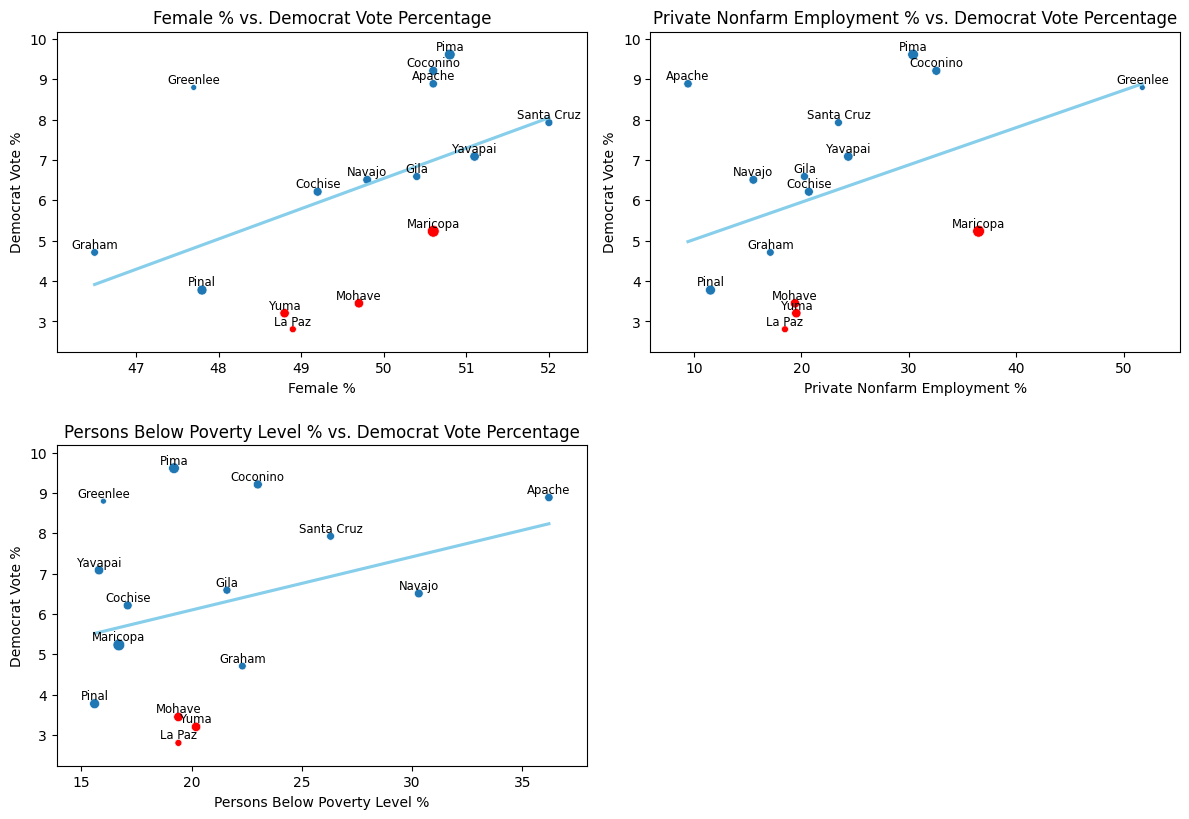

In [31]:
axes = plot_features_with_outliers_annotated(arizona, arizona_democrat_to_plot)
individual_point_selector(arizona, axes[0, 0], ["La Paz", "Mohave", "Yuma", "Maricopa"])
individual_point_selector(arizona, axes[0, 1], ["La Paz", "Mohave", "Yuma", "Maricopa"])
individual_point_selector(arizona, axes[1, 0], ["La Paz", "Yuma", "Mohave"])

The list of identified counties with demographics. Among these, Maricopa stands out as the most promising due to having the largest statewide population.

- Females in Yuma, La Paz, and Mohave.
- Privately employed individuals in Maricopa, Mohave, and La Paz, Yuma.
- People below the poverty level in Pinal, Mohave, and Yuma.

The method of aggregating data may result in false positives, leading to unreliable conclusions and potentially misleading interpretations of the data. Although I feel bad about this, I don't see another viable option if I wish to derive any findings for this state.

### Negative Correlations Between Demographics and Democratic Party Support

Next, the exploration aims to identify insights from demographics that tend to avoid voting for Democrats. This part of the work follows a similar structure and also tries to deal with sample size limitations, I will provide fewer comments and focus on adding new information.

In [32]:
arizona_bottom_features = arizona_correlation.sort_values(
    by="Democrat Corr Coeff", ascending=True
)
arizona_bottom_features_list = arizona_bottom_features.index.tolist()[:2]
arizona_bottom_features.head()

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Age Over 65 %,-0.16,-0.47,0.08
Veterans %,-0.27,-0.44,0.10
Foreign Born %,-0.05,-0.35,0.20
Homeownership %,-0.14,-0.34,0.22
White Non Hispanic %,-0.04,-0.32,0.24


- As expected, we can observe high p-values. This time, according to the data there are no statisticly significant groups that avoid voting for democrats. This is obviously not the case in the real world.  
- Unfortunately, at this point, I can either drop the Arizona analysis or continue using questionable methods to find any significant results. I understand this is not best practice, but for now, I will consider features with p-values of 0.1 or less as statistically significant. It's either this or abandoning the state analysis and moving on.
- The two top features: elderly and veterans are commonly known to be part of the core Republican support base.

Next is data aggregation between Arizona and Nevada:

In [33]:
arizona_nevada_bottom_features = arizona_nevada_correlation.loc[
    (arizona_nevada_correlation["Democrat p-value"] <= 0.05)
    & (arizona_nevada_correlation["Democrat Corr Coeff"] < 0.1)
]
arizona_nevada_bottom_features_list = arizona_nevada_bottom_features.index.tolist()
arizona_nevada_bottom_features.sort_values(by="Democrat Corr Coeff", ascending=True)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
White Non Hispanic %,-0.11,-0.57,0.00
Two Or More Race %,-1.92,-0.47,0.01
Per Capita Income,-0.00,-0.47,0.01
Median Household Income,-0.00,-0.46,0.01


Potentialy unfavorable demographics so far:

In [34]:
arizona_democrat_to_plot = list(
    OrderedDict.fromkeys(
        arizona_bottom_features_list + arizona_nevada_bottom_features_list
    )
)
arizona_correlation.loc[arizona_democrat_to_plot].sort_values(
    by="Democrat Slope", ascending=True
)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Two Or More Race %,-0.59,-0.17,0.54
Veterans %,-0.27,-0.44,0.10
Age Over 65 %,-0.16,-0.47,0.08
White Non Hispanic %,-0.04,-0.32,0.24
Per Capita Income,-0.00,0.04,0.89
Median Household Income,0.00,0.14,0.63


- Features like per capita income and median housing value have the slope around 0. 
- The reduced support among veterans, older individuals, and white non-Hispanics aligns with the Republican party's traditional base.
- A very significant issue arises with the demographic of mixed-race population.

It is well-known that the success of the Democratic party often relies on winning minority voters, and this result contradicts that knowledge. It's conceivable that these voters were unenthusiastic about voting for the Democratic party or were disappointed, but the strong negative trend is concerning. One interpretation is that my idea of aggregating data was incorrect, leading to erroneous results, casting doubt on my previous findings and the future ability to analyze states with a small number of counties. Another possibility is that the Democratic strategy backfired, resulting in the opposite outcome. This data would indicate that both minority and majority populations are not supporting Democrats.

*At this point, I did not explore why the slope is zero, as there was a more immediate issue, and the realization of why that is the case will come to me in the next chapter. I chose not to fix it at the end and moved on with the project.*

Maybe there is some relation between 'Two Or More Race %' and other features that may explain this negative trend.

In [35]:
tomr_research = feature_research(arizona, "Two Or More Race %").sort_values(
    by="Corr Coeff", ascending=False
)
tomr_research[tomr_research["p-value"] <= 0.05].sort_values(by="Slope", ascending=False)

,Slope,Corr Coeff,p-value
Asian %,0.55,0.76,0.00
Black %,0.23,0.60,0.02
Women Owned Firms %,0.14,0.71,0.01
Manufacturers Shipments Per Capita,0.08,0.54,0.04
Veterans %,0.08,0.52,0.05
Foreign Born %,0.03,0.62,0.02
Per Capita Income,0.00,0.74,0.00
Persons Below Poverty Level %,-0.08,-0.53,0.05


- Nothing particular stands out. This information simply indicates that this feature is connected to the Asian and Black populations, which makes sense. It also excludes the White population, which is generally known to be more supportive of the Republican party.

For curiosity, I will check what the White Non-Hispanic population is associated with.

In [36]:
wnh_research = feature_research(arizona, "White Non Hispanic %").sort_values(
    by="Corr Coeff", ascending=False
)
wnh_research[wnh_research["p-value"] <= 0.05].sort_values(by="Slope", ascending=False)

,Slope,Corr Coeff,p-value
Veterans %,1.86,0.59,0.04
Age Over 65 %,0.75,0.68,0.02
Non English Home %,-0.94,-0.80,0.00
Age Under 18 %,-2.12,-0.78,0.00
Age Under 5 %,-8.74,-0.85,0.00


Well, I believe this marks the end of the analysis. It was already built on shaky ground, and this is too much; I can't continue further. For reference, are there any statistically significant demographics that either vote for or against Republicans in Arizona?

In [37]:
arizona_republican_correlation = no_iqr_calculate_correlations(arizona).iloc[:, 3:]
arizona_republican_correlation[
    arizona_republican_correlation["Republican p-value"] <= 0.05
].sort_values(by="Republican Corr Coeff", ascending=False)

,Republican Slope,Republican Corr Coeff,Republican p-value
White Non Hispanic %,0.13,0.72,0.00
Veterans %,0.55,0.67,0.01
Age Over 65 %,0.20,0.51,0.05
Age Under 5 %,-1.62,-0.56,0.03
Age Under 18 %,-0.44,-0.60,0.02
Persons Per Household,-3.97,-0.65,0.01
Non English Home %,-0.12,-0.74,0.00


- There are 7 statistically significant correlations with voters compared to 1 for Democrats. This could indicate a more polarized opinion about the party, detectable even with a small sample size, both for support and non-support

In [38]:
print("White Non Hispanic %:", arizona["White Non Hispanic %"].median())
print("Veterans %:", round(arizona["Veterans %"].median(), 2))
print("Age Over 65 %:", arizona["Age Over 65 %"].median())

White Non Hispanic %: 54.9
Veterans %: 8.77
Age Over 65 %: 17.4


The "White Non-Hispanic" demographic represents a significant portion of the population. Having appeal to this group could potentially secure a substantial number of votes for the Republican party.

## Proof of Method: Wisconsin

In this chapter, I'll focus on implementing the methods outlined in the "Method" chapter without adding further interpretations. I will adhere to a significance threshold of 0.05. Wisconsin was randomly chosen for this chapter. It has 72 counties.

In the general election, out of a total population of 5.775 million, encompassing all residents rather than just eligible voters, Donald Trump garnered 1,405,284 votes (24.33%), while Hillary Clinton secured 1,382,536 votes (23.94%). Trump's victory margin was 22,748 votes (0.39%). Here are the election results based on the primaries::

In [39]:
selected_states = ["Wisconsin"]
wisconsin = merge_demographics_with_votes(demographics, primary_res, selected_states)
wisconsin_correlation = calculate_correlations(wisconsin).iloc[:, :3]
no_iqr_wisconsin_correlation = no_iqr_calculate_correlations(wisconsin).iloc[:, :3]
state_info(wisconsin)

2014 State Population: 5757564
Votes for Democrats: 1000703, 17.38% of the population.
Votes for Republicans: 1072699, 18.63% of the population.


- Vote margins in both the general election and the primaries are close.

### Positive Correlations Between Demographics and Democratic Party Support


Let's proceed with selecting demographics that are most likely to support Democrats. With a sufficient number of samples, we can remove outliers, enabling us to measure the trends of the majority of the population. For comparison, I will calculate the correlations both after removing outliers using the Interquartile Range (IQR) and retaining them.

In [40]:
# With outliers
no_iqr_wisconsin_top_features = no_iqr_wisconsin_correlation.loc[
    (no_iqr_wisconsin_correlation["Democrat p-value"] <= 0.05)
    & (no_iqr_wisconsin_correlation["Democrat Corr Coeff"] > 0)
]
no_iqr_wisconsin_top_features_list = no_iqr_wisconsin_top_features.index.tolist()
no_iqr_wisconsin_top_features.sort_values(by="Democrat Corr Coeff", ascending=False)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Bachelor Degree Or Higher %,0.27,0.47,0.00
Accommodation Food Services Sales Per Capita,0.90,0.41,0.00
HS Grad Or Higher %,0.60,0.39,0.00
Private Nonfarm Employment %,0.11,0.35,0.00
Female %,0.97,0.29,0.01
Two Or More Race %,2.44,0.27,0.02
Multi Unit Structures %,0.16,0.25,0.03
Private Nonfarm Establishments %,1.78,0.24,0.05


In [41]:
# Without outliers
wisconsin_top_features = wisconsin_correlation.loc[
    (wisconsin_correlation["Democrat p-value"] <= 0.05)
    & (wisconsin_correlation["Democrat Corr Coeff"] > 0)
]
wisconsin_top_features_list = wisconsin_top_features.index.tolist()
wisconsin_top_features.sort_values(by="Democrat Corr Coeff", ascending=False)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Bachelor Degree Or Higher %,0.22,0.43,0.00
Private Nonfarm Employment %,0.10,0.32,0.01
Per Capita Income,0.00,0.27,0.03
HS Grad Or Higher %,0.23,0.26,0.03
Median Housing Value,0.00,0.26,0.04


- Removing outliers altered the statistical significance of several features.
- Some numeric features have slopes of 0 in the dataframe. However, this doesn't necessarily imply that the actual slopes are zero. Up to this point, I've primarily dealt with percentages, where a change by a value close to zero would suggest lack of support from a demographic. However, in the case of a feature with a broader range of predictor variables, a slope near zero could still indicate significant support from that demographic.

Features that are no longer statistically significant after outlier removal:

In [42]:
set(no_iqr_wisconsin_top_features_list) - set(wisconsin_top_features_list)

{'Accommodation Food Services Sales Per Capita',
 'Female %',
 'Multi Unit Structures %',
 'Private Nonfarm Establishments %',
 'Two Or More Race %'}

New features that bacame statisticly significant:

In [43]:
set(wisconsin_top_features_list) - set(no_iqr_wisconsin_top_features_list)

{'Median Housing Value', 'Per Capita Income'}

- Since I am interested in understanding how a population behaves on average, I will work the results with removed outliers. This amounts to five demographics that, according to my analysis, exhibit the highest ability to garner votes for Democrats.
- Two out of three identified demographics in Arizona match the results in Wisconsin: "Bachelor's Degree or Higher %" and "Private Nonfarm Employment %". The third demographic, "Females %", initially identified with outliers, lost its statistical significance value with a p-value of 0.06 after outlier removal.

The identified demographis are:

In [44]:
wisconsin_top_features_list

['HS Grad Or Higher %',
 'Bachelor Degree Or Higher %',
 'Median Housing Value',
 'Per Capita Income',
 'Private Nonfarm Employment %']

- The 'Private Nonfarm Employment %' demographic shows less support for the Democratic party compared to the other two features in percentages.

Next is the county selection. The outliers, as identified by the IQR method, are plotted in teal. These points were excluded when the regression line was drawn. Since there are a lot more points this time, manual selection is no longer practical. Therefore, I employ a function to select data points lying a certain distance below a regression line. These points are then accentuated in red, and their corresponding county names are returned. This process selects points below a certain distance from the expected average value in the y-axis. This approach is quicker and less arbitrary, maintaining some order in the selection process.

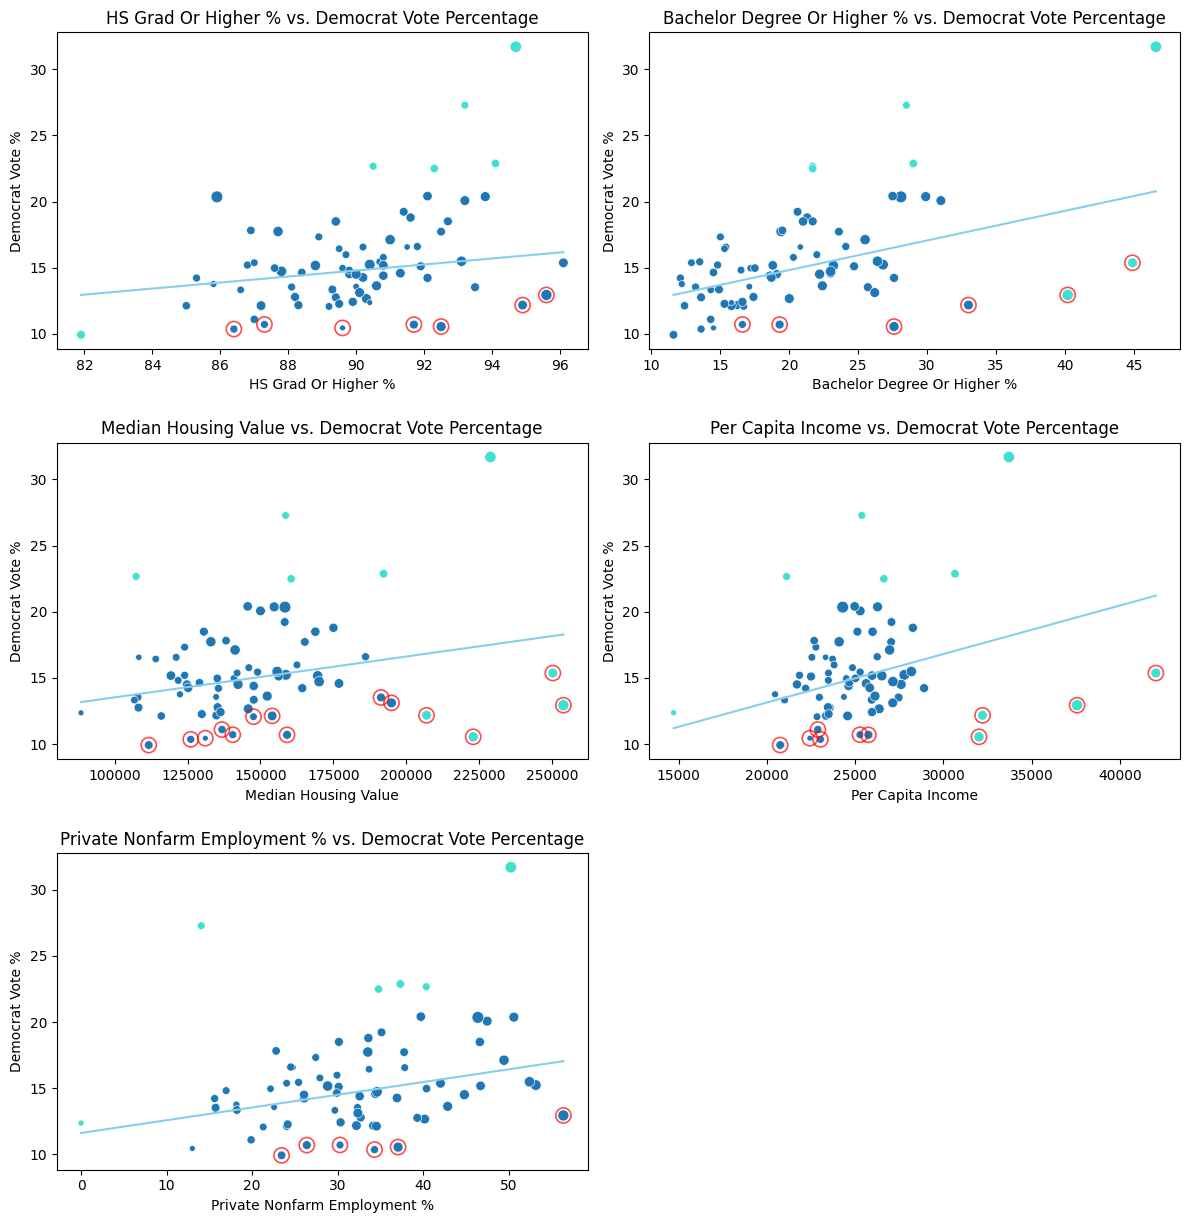

In [45]:
axes = plot_features_no_outliers(wisconsin, wisconsin_top_features_list)
selected_counties = {
    "HS Grad Or Higher": point_selector(wisconsin, axes[0, 0], 3.1),
    "Bachelor Degree Or Higher": point_selector(wisconsin, axes[0, 1], 3.2),
    "Median Housing Value": point_selector(wisconsin, axes[1, 0], 2.8),
    "Per Capita Income": point_selector(wisconsin, axes[1, 1], 3),
    "Private Nonfarm Employment": point_selector(wisconsin, axes[2, 0], 2.9),
}

Demographics with selected counties to target:

In [46]:
for key, counties in selected_counties.items():
    print(f"{key}: {', '.join(counties)}")

HS Grad Or Higher: Florence, Green Lake, Polk, St. Croix, Taylor, Washington, Waukesha
Bachelor Degree Or Higher: Green Lake, Ozaukee, Polk, St. Croix, Washington, Waukesha
Median Housing Value: Burnett, Clark, Dodge, Florence, Green Lake, Ozaukee, Pierce, Polk, St. Croix, Taylor, Walworth, Washington, Waukesha, Waushara
Per Capita Income: Clark, Florence, Green Lake, Ozaukee, Polk, St. Croix, Taylor, Washington, Waukesha, Waushara
Private Nonfarm Employment: Clark, Green Lake, Polk, Taylor, Washington, Waukesha


 Impact of demographic outreach:

- For a broad demographic targeting, it is possible to estimate the number of people demographic outreach initiatives could reach for some features since they are represented as percentages of the total population. However, other features are expressed as counts per capita, which doesn't indicate how many individuals are identified with this demographic.
- Regarding counties, it is likely that a county would be identified multiple times, so it is not possible to calculate an exact number of people.

### Negative Correlations Between Demographics and Democratic Party Support

In [47]:
wisconsin_bottom_features = wisconsin_correlation.loc[
    (wisconsin_correlation["Democrat p-value"] <= 0.05)
    & (wisconsin_correlation["Democrat Corr Coeff"] < 0)
]
wisconsin_bottom_features.sort_values(by="Democrat Corr Coeff", ascending=True)

,Democrat Slope,Democrat Corr Coeff,Democrat p-value
Homeownership %,-0.20,-0.28,0.02
Mean Travel Time To Work,-0.24,-0.25,0.04


- Two features are negatively correlated with voting for Democrats.

Previously, I explained that a negative correlation could be akin to a positive correlation, suggesting potential easier voters. In this case, 'Homeownership %' would be one such group, as a person either owns a home or not, and those who do not own a home want to have one. In contrast, for groups such as veterans, which are likely to show reduced support for Democrats, identifying the opposite demographic doesn't make sense, as being a non-veteran is not a political issue. 'Mean Travel Time To Work' may not have such meaning, but it would require further exploration to find out. Let's examine the opposite group of homeowners.


 In this case, 'Homeownership %' would be one such group, as a person either owns a home or not, and those who do not own a home aspire to have one. In contrast, for groups such as veterans, which are likely to show reduced support for Democrats, identifying the opposite demographic doesn't make sense, as being a non-veteran is not a political issue. 'Mean Travel Time To Work' may not have such significance, but it would require further exploration to determine. Let's examine the opposite group of homeowners.


First, I will check the statistical significance of the relationship between non-homeowners and voting for the Democratic party because a reversed feature of a statistically significant feature is probably not necessarily statistically significant itself.

In [48]:
wisconsin["Non Home Owners %"] = 100 - wisconsin["Homeownership %"]
iqr_new_feature = iqr(wisconsin[["Non Home Owners %", "Democrat Vote %"]])
spearmanr(iqr_new_feature)

SignificanceResult(statistic=0.2830659400180218, pvalue=0.02127764614017901)

- Being a non-homeowner is a statistically significant factor for supporting Democrats.


Let's identify counties with a high percentage of non-homeowners to target.

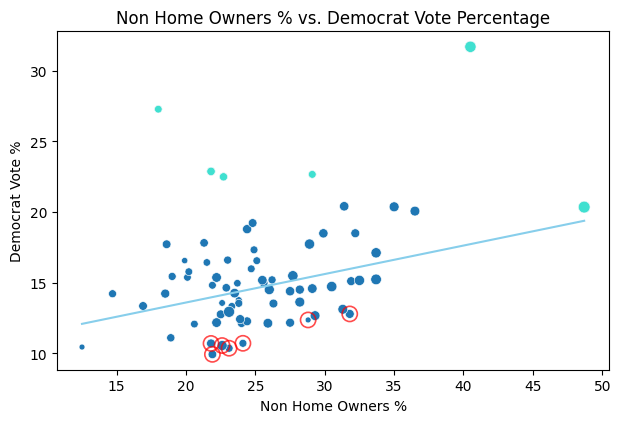

In [49]:
axes = plot_features_no_outliers(wisconsin, ["Non Home Owners %"])
Non_Home_Owners_counties = point_selector(wisconsin, axes[0, 0], 3)

Identified counties for "Non Home Owners %' are:

In [50]:
print(*Non_Home_Owners_counties, sep=", ")

Clark, Green Lake, Menominee, Monroe, Polk, Taylor, Washington


# Conclusion

During the project, an easily repeatable method was developed and with the state of Wisconsin, I was able to demonstrate my strategic investment idea. To provide a more comprehensive suggestion on how to win elections, this process would need to be replicated for each swing state. However, I don't intend to repeat it because I doubt it would bring much new learning value. It's likely that as I continued through the states, new issues would arise that I would have to address, such as the small sample size in Arizona requiring various methods to verify statistical significance, or the case of Wisconsin requiring a rethinking of how to select individual counties due to the large amount of data points.

Remaining Ideas and Future Directions:

1) An immediate change I would try is to normalize all features to the same scale. Currently, only features expressed as percentages are usable.
2) Another approach to continue this work would be to create a higher-priority tier of counties based on overlaping beneficial demographics.
3) I did not attempt to assess the interdependence of features. All demographic groups are connected, and I'm not aware of a good way to gather useful information in this regard. I doubt the correlation coefficient and the slope could provide me with sufficient insight.
4) If the ranges of the y-axis are consistently close, it could be useful to establish a single value relative to the intercept to identify counties. This method would be more robust against biases introduced by manual selection.
5) In this work, I was unable to find a way to utilize information about demographics that are correlated with voting for Republicans. While it would make sence to identify where the opponent is weak and target those areas, I was unable to devise a method. If a demographic is negatively correlated with the Republican party, it does not necessarily mean they support Democrats. This distinction is based on separate correlation and slope measurements. The only option I can think of is if a demographic strongly avoids voting for one party and only slightly supports the other, as indicated by the size of slope.
6) A crucial next step for future analysis would be temporal assessment. Demographics in the US are changing rapidly, and this analysis was based on a single point in time. Swing states can change over time (for example, Georgia became a swing state in 2020), but without knowing which demographics are increasing or decreasing, it is difficult to predict whether support for a party in a state will grow or decline over time.
7) To consider a demographic significant supporter or not, further work would probably involve creating a significance level for the correlation coefficient and the slope.
8) Using the 2016 primary data is best suited for preparing for the general election that year. To prepare for the 2020 election, it would be more appropriate to use the results of the 2016 general election.